In [ ]:
from google.colab import files
uploaded = files.upload()

Saving destinasi-wisata-indonesia.csv to destinasi-wisata-indonesia.csv


In [ ]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 11.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# 1. Definisi Variabel Fuzzy
anggaran = ctrl.Antecedent(np.arange(0, 500001, 10000), 'anggaran')  # dalam Rupiah
durasi = ctrl.Antecedent(np.arange(0, 11, 1), 'durasi')              # dalam hari
jenis_destinasi = ctrl.Consequent(np.arange(0, 101, 1), 'jenis_destinasi')

# 2. Membership Function
anggaran['murah'] = fuzz.trimf(anggaran.universe, [0, 0, 150000])
anggaran['sedang'] = fuzz.trimf(anggaran.universe, [100000, 250000, 400000])
anggaran['mahal'] = fuzz.trimf(anggaran.universe, [300000, 500000, 500000])

durasi['singkat'] = fuzz.trimf(durasi.universe, [0, 0, 3])
durasi['sedang'] = fuzz.trimf(durasi.universe, [2, 5, 7])
durasi['lama'] = fuzz.trimf(durasi.universe, [6, 10, 10])

jenis_destinasi['kota'] = fuzz.trimf(jenis_destinasi.universe, [0, 0, 50])
jenis_destinasi['pantai'] = fuzz.trimf(jenis_destinasi.universe, [25, 50, 75])
jenis_destinasi['alam'] = fuzz.trimf(jenis_destinasi.universe, [50, 100, 100])

# 3. Load Dataset
df = pd.read_csv('destinasi-wisata-indonesia.csv')
print(df[['Place_Name', 'Price', 'Time_Minutes']].head())

                          Place_Name   Price  Time_Minutes
0                   Monumen Nasional   20000          15.0
1                           Kota Tua       0          90.0
2                      Dunia Fantasi  270000         360.0
3  Taman Mini Indonesia Indah (TMII)   10000           NaN
4           Atlantis Water Adventure   94000          60.0


In [ ]:
# 2. Fungsi Keanggotaan untuk Anggaran
anggaran['murah'] = fuzz.trimf(anggaran.universe, [0, 0, 150000])
anggaran['sedang'] = fuzz.trimf(anggaran.universe, [100000, 250000, 400000])
anggaran['mahal'] = fuzz.trimf(anggaran.universe, [300000, 500000, 500000])

# 3. Fungsi Keanggotaan untuk Durasi Liburan (dalam hari)
durasi['singkat'] = fuzz.trimf(durasi.universe, [0, 0, 3])
durasi['sedang'] = fuzz.trimf(durasi.universe, [2, 5, 7])
durasi['lama'] = fuzz.trimf(durasi.universe, [6, 10, 10])

# 4. Fungsi Keanggotaan untuk Jenis Destinasi (Output)
jenis_destinasi['kota'] = fuzz.trimf(jenis_destinasi.universe, [0, 0, 40])
jenis_destinasi['pantai'] = fuzz.trimf(jenis_destinasi.universe, [30, 50, 70])
jenis_destinasi['alam'] = fuzz.trimf(jenis_destinasi.universe, [60, 100, 100])

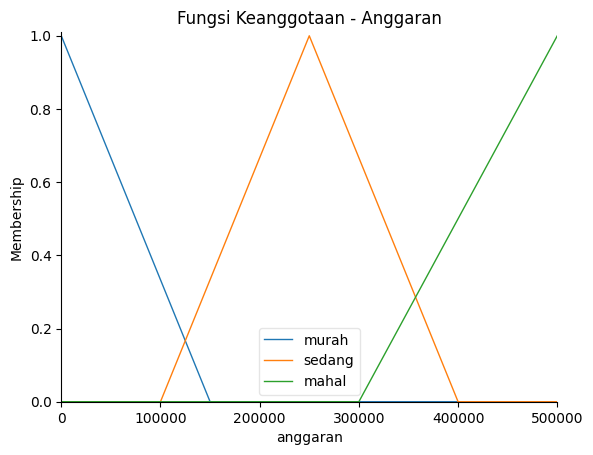

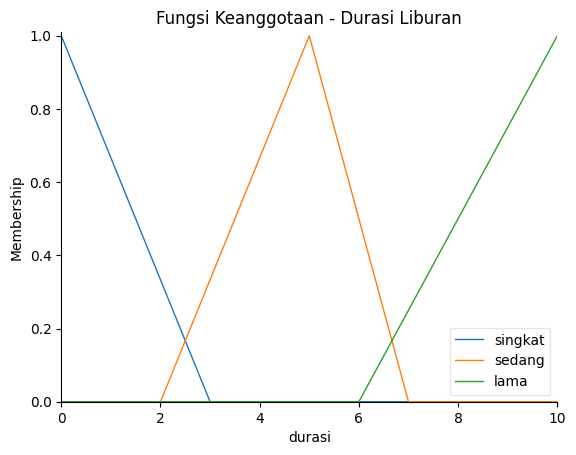

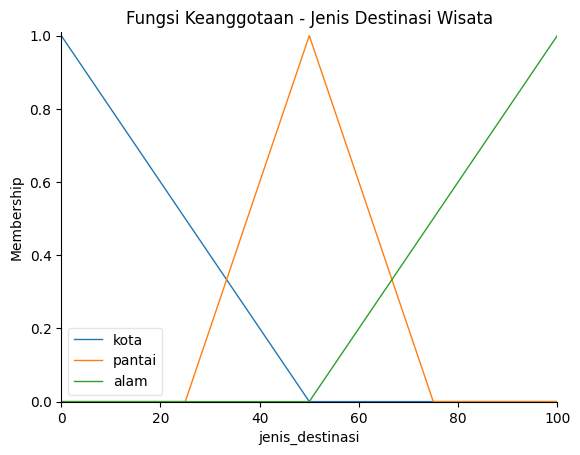

In [ ]:
import matplotlib.pyplot as plt

# Visualisasi Fungsi Keanggotaan Anggaran
anggaran.view()
plt.title("Fungsi Keanggotaan - Anggaran")
plt.show()

# Visualisasi Fungsi Keanggotaan Durasi Liburan
durasi.view()
plt.title("Fungsi Keanggotaan - Durasi Liburan")
plt.show()

# Visualisasi Fungsi Keanggotaan Jenis Destinasi
jenis_destinasi.view()
plt.title("Fungsi Keanggotaan - Jenis Destinasi Wisata")
plt.show()

<Figure size 800x400 with 0 Axes>

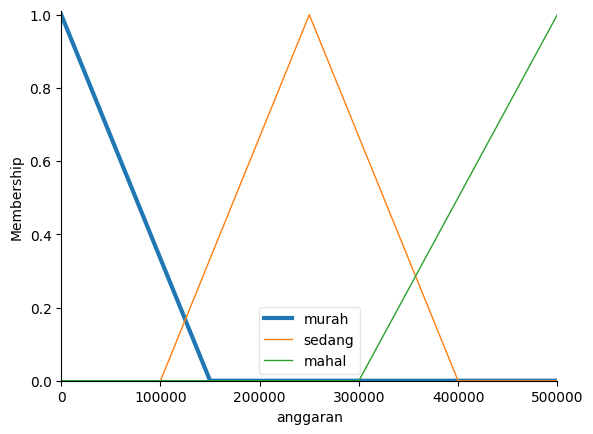

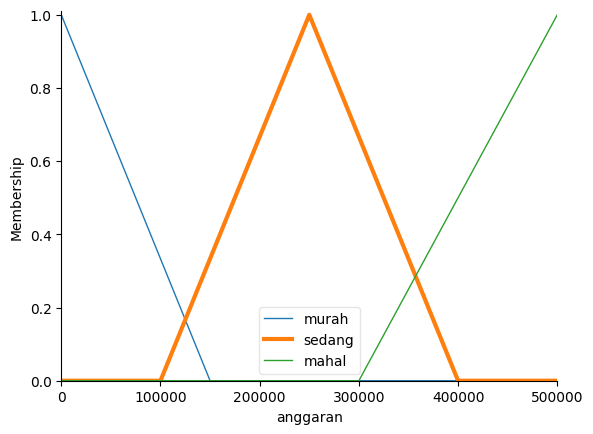

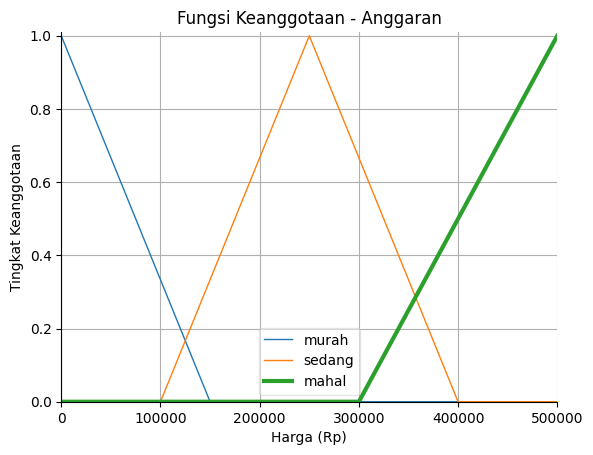

<Figure size 800x400 with 0 Axes>

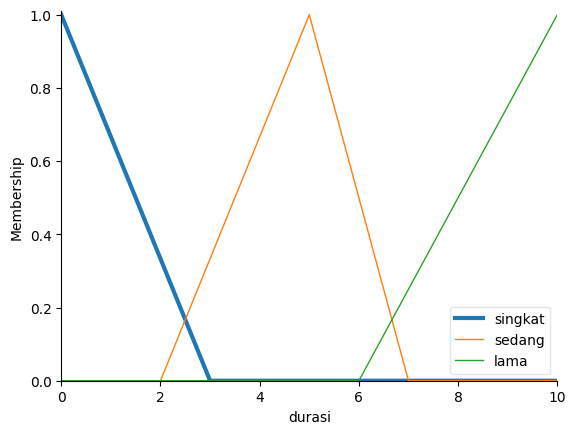

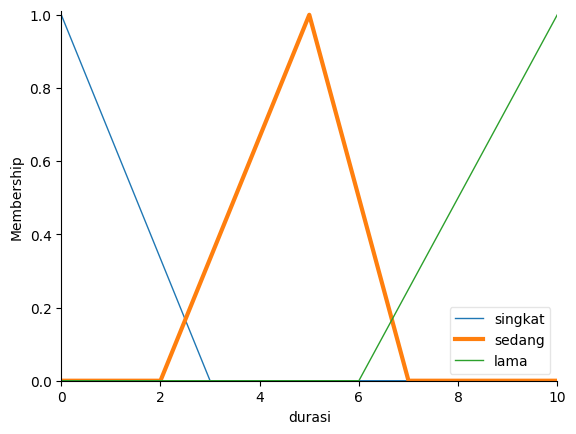

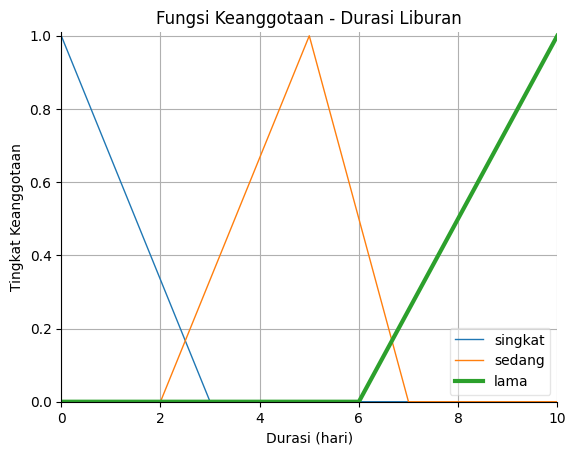

<Figure size 800x400 with 0 Axes>

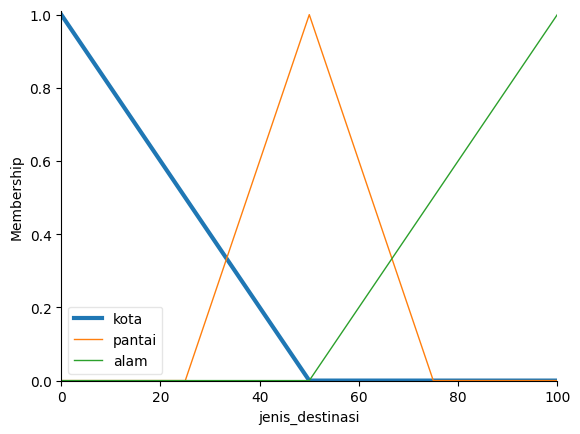

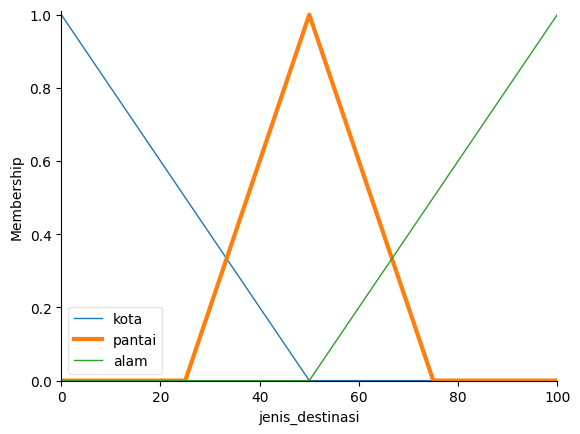

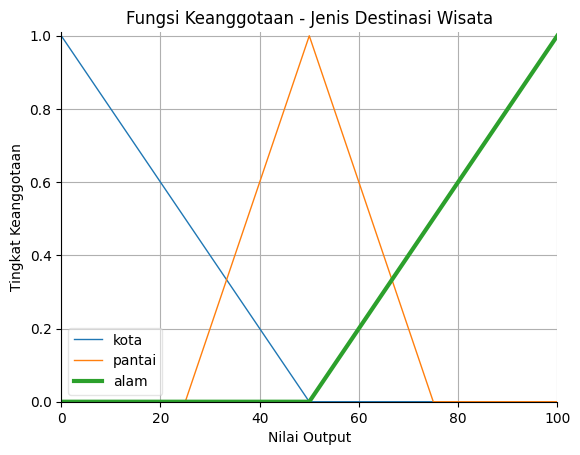

In [ ]:
import matplotlib.pyplot as plt

# Visualisasi Fungsi Keanggotaan - Anggaran
plt.figure(figsize=(8, 4))
anggaran['murah'].view()
anggaran['sedang'].view()
anggaran['mahal'].view()
plt.title("Fungsi Keanggotaan - Anggaran")
plt.xlabel("Harga (Rp)")
plt.ylabel("Tingkat Keanggotaan")
plt.grid(True)
plt.show()

# Visualisasi Fungsi Keanggotaan - Durasi Liburan
plt.figure(figsize=(8, 4))
durasi['singkat'].view()
durasi['sedang'].view()
durasi['lama'].view()
plt.title("Fungsi Keanggotaan - Durasi Liburan")
plt.xlabel("Durasi (hari)")
plt.ylabel("Tingkat Keanggotaan")
plt.grid(True)
plt.show()

# Visualisasi Fungsi Keanggotaan - Jenis Destinasi Wisata
plt.figure(figsize=(8, 4))
jenis_destinasi['kota'].view()
jenis_destinasi['pantai'].view()
jenis_destinasi['alam'].view()
plt.title("Fungsi Keanggotaan - Jenis Destinasi Wisata")
plt.xlabel("Nilai Output")
plt.ylabel("Tingkat Keanggotaan")
plt.grid(True)
plt.show()

In [ ]:
rule1 = ctrl.Rule(anggaran['murah'] & durasi['singkat'], jenis_destinasi['kota'])
rule2 = ctrl.Rule(anggaran['murah'] & durasi['sedang'], jenis_destinasi['alam'])
rule3 = ctrl.Rule(anggaran['murah'] & durasi['lama'], jenis_destinasi['alam'])
rule4 = ctrl.Rule(anggaran['sedang'] & durasi['singkat'], jenis_destinasi['kota'])
rule5 = ctrl.Rule(anggaran['sedang'] & durasi['sedang'], jenis_destinasi['pantai'])
rule6 = ctrl.Rule(anggaran['sedang'] & durasi['lama'], jenis_destinasi['pantai'])
rule7 = ctrl.Rule(anggaran['mahal'] & durasi['singkat'], jenis_destinasi['kota'])
rule8 = ctrl.Rule(anggaran['mahal'] & durasi['sedang'], jenis_destinasi['pantai'])
rule9 = ctrl.Rule(anggaran['mahal'] & durasi['lama'], jenis_destinasi['pantai'])

In [ ]:
destinasi_ctrl = ctrl.ControlSystem([
    rule1, rule2, rule3,
    rule4, rule5, rule6,
    rule7, rule8, rule9
])

destinasi_simulasi = ctrl.ControlSystemSimulation(destinasi_ctrl)

In [ ]:
def prediksi_destinasi(budget, durasi_input):
    destinasi_simulasi.input['anggaran'] = budget
    destinasi_simulasi.input['durasi'] = durasi_input
    destinasi_simulasi.compute()
    hasil = destinasi_simulasi.output['jenis_destinasi']

    if hasil < 40:
        return "Kota"
    elif hasil < 70:
        return "Pantai"
    else:
        return "Alam"

In [ ]:
# Tambahkan kolom anggaran dan durasi dari data
df['anggaran'] = df['Price']
df['durasi_liburan'] = df['Time_Minutes']

# Fungsi prediksi dari fuzzy system
def prediksi_destinasi(budget, durasi):
    destinasi_simulasi.input['anggaran'] = budget
    # Change 'waktu_liburan' to 'durasi' to match the defined Antecedent
    destinasi_simulasi.input['durasi'] = durasi
    destinasi_simulasi.compute()
    hasil = destinasi_simulasi.output['jenis_destinasi']
    if hasil < 40:
        return "Kota"
    elif hasil < 70:
        return "Alam"
    else:
        return "Pantai"

# Terapkan ke seluruh data
df['destinasi_rekomendasi'] = df.apply(
    lambda row: prediksi_destinasi(row['anggaran'], row['durasi_liburan']),
    axis=1
)

# Evaluasi: distribusi rekomendasi
print(df['destinasi_rekomendasi'].value_counts())

destinasi_rekomendasi
Alam      237
Pantai    186
Kota       14
Name: count, dtype: int64


In [ ]:
import numpy as np

# Tetapkan seed agar hasil acak bisa direproduksi
np.random.seed(42)

# Tambahkan kolom 'destinasi_asli' secara acak untuk latihan
df['destinasi_asli'] = np.random.choice(['Kota', 'Pantai', 'Alam'], size=len(df))

# Tampilkan distribusi untuk cek
print(df['destinasi_asli'].value_counts())

destinasi_asli
Alam      150
Kota      144
Pantai    143
Name: count, dtype: int64


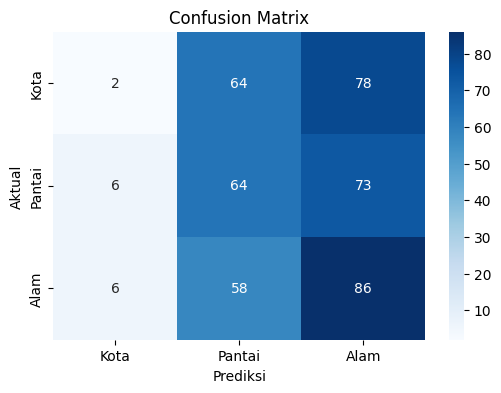

Laporan Klasifikasi:

              precision    recall  f1-score   support

        Alam       0.36      0.57      0.44       150
        Kota       0.14      0.01      0.03       144
      Pantai       0.34      0.45      0.39       143

    accuracy                           0.35       437
   macro avg       0.28      0.34      0.29       437
weighted avg       0.28      0.35      0.29       437



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Pastikan label asli tersedia
if 'destinasi_asli' in df.columns:
    # Confusion Matrix
    cm = confusion_matrix(df['destinasi_asli'], df['destinasi_rekomendasi'], labels=["Kota", "Pantai", "Alam"])

    # Visualisasi Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Kota", "Pantai", "Alam"],
                yticklabels=["Kota", "Pantai", "Alam"])
    plt.xlabel("Prediksi")
    plt.ylabel("Aktual")
    plt.title("Confusion Matrix")
    plt.show()

    # Classification Report
    print("Laporan Klasifikasi:\n")
    print(classification_report(df['destinasi_asli'], df['destinasi_rekomendasi']))
else:
    print("Kolom 'destinasi_asli' tidak ditemukan. Tambahkan label aktual untuk evaluasi.")


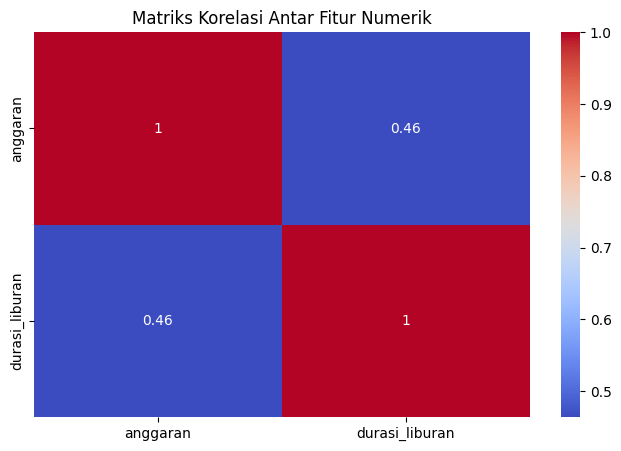

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasi antar fitur numerik
plt.figure(figsize=(8, 5))
# Remove 'minat_wisata' as it does not exist in the DataFrame
sns.heatmap(df[['anggaran', 'durasi_liburan']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Matriks Korelasi Antar Fitur Numerik")
plt.show()